<a href="https://colab.research.google.com/github/sujal2060/BASICPROGRAM-AND-PROJECT/blob/main/exploring_and_visualizing_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Common imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# To make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['axes.grid'] = True

In [ ]:
# Load the data (assuming we've already run the previous notebook)
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

# Get the data
housing = fetch_california_housing()
housing_df = pd.DataFrame(housing.data, columns=housing.feature_names)
housing_df["MedHouseVal"] = housing.target

# Create income categories for stratified sampling
housing_df["income_cat"] = pd.cut(housing_df["MedInc"],
                                  bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                                  labels=[1, 2, 3, 4, 5])

# Split the data using stratified sampling
strat_train_set, strat_test_set = train_test_split(
    housing_df,
    test_size=0.2,
    stratify=housing_df["income_cat"],
    random_state=42)

# Remove the income_cat column
for data_set in (strat_train_set, strat_test_set):
    data_set.drop("income_cat", axis=1, inplace=True)

# Create a copy of the training set for exploration
housing = strat_train_set.copy()

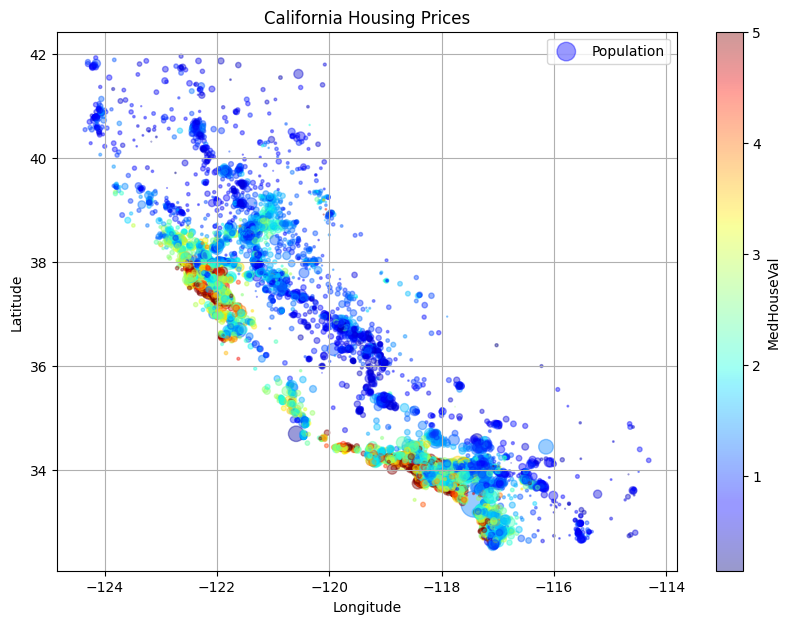

In [ ]:
# Create a scatter plot of housing prices
housing.plot(kind="scatter", x="Longitude", y="Latitude", alpha=0.4,
             s=housing["Population"]/100, label="Population",
             c="MedHouseVal", cmap=plt.get_cmap("jet"),
             colorbar=True, figsize=(10, 7))
plt.legend()
plt.title("California Housing Prices")
plt.show()

In [ ]:
# Calculate the correlation matrix
corr_matrix = housing.corr()

# Look at the correlations with the target variable
corr_matrix["MedHouseVal"].sort_values(ascending=False)

,MedHouseVal
MedHouseVal,1.000000
MedInc,0.687151
AveRooms,0.146255
HouseAge,0.114146
AveOccup,-0.021991
Population,-0.026882
AveBedrms,-0.043294
Longitude,-0.047466
Latitude,-0.142673


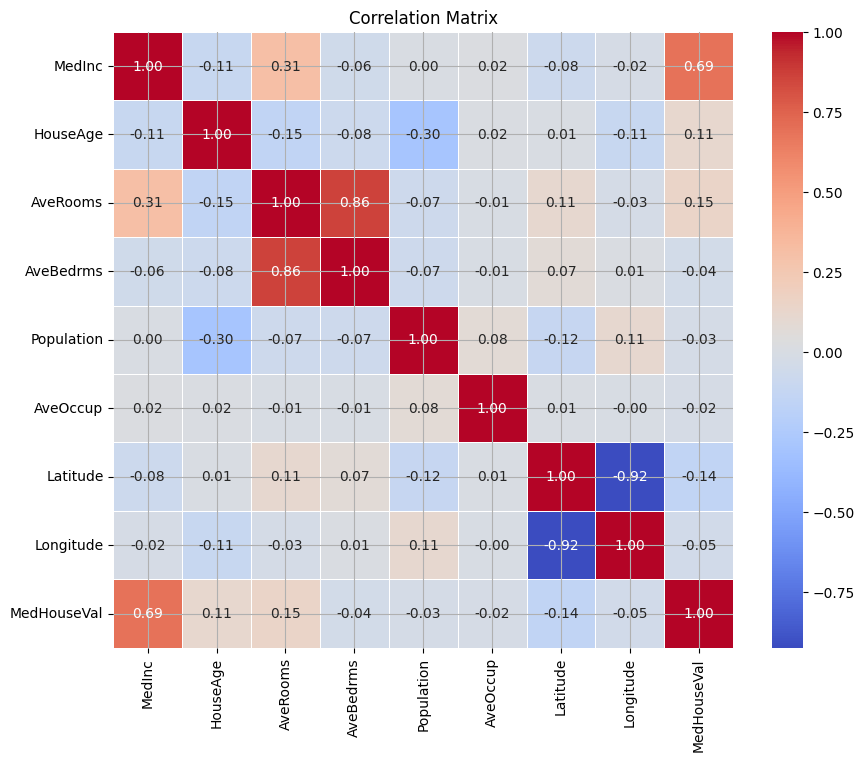

In [ ]:
# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

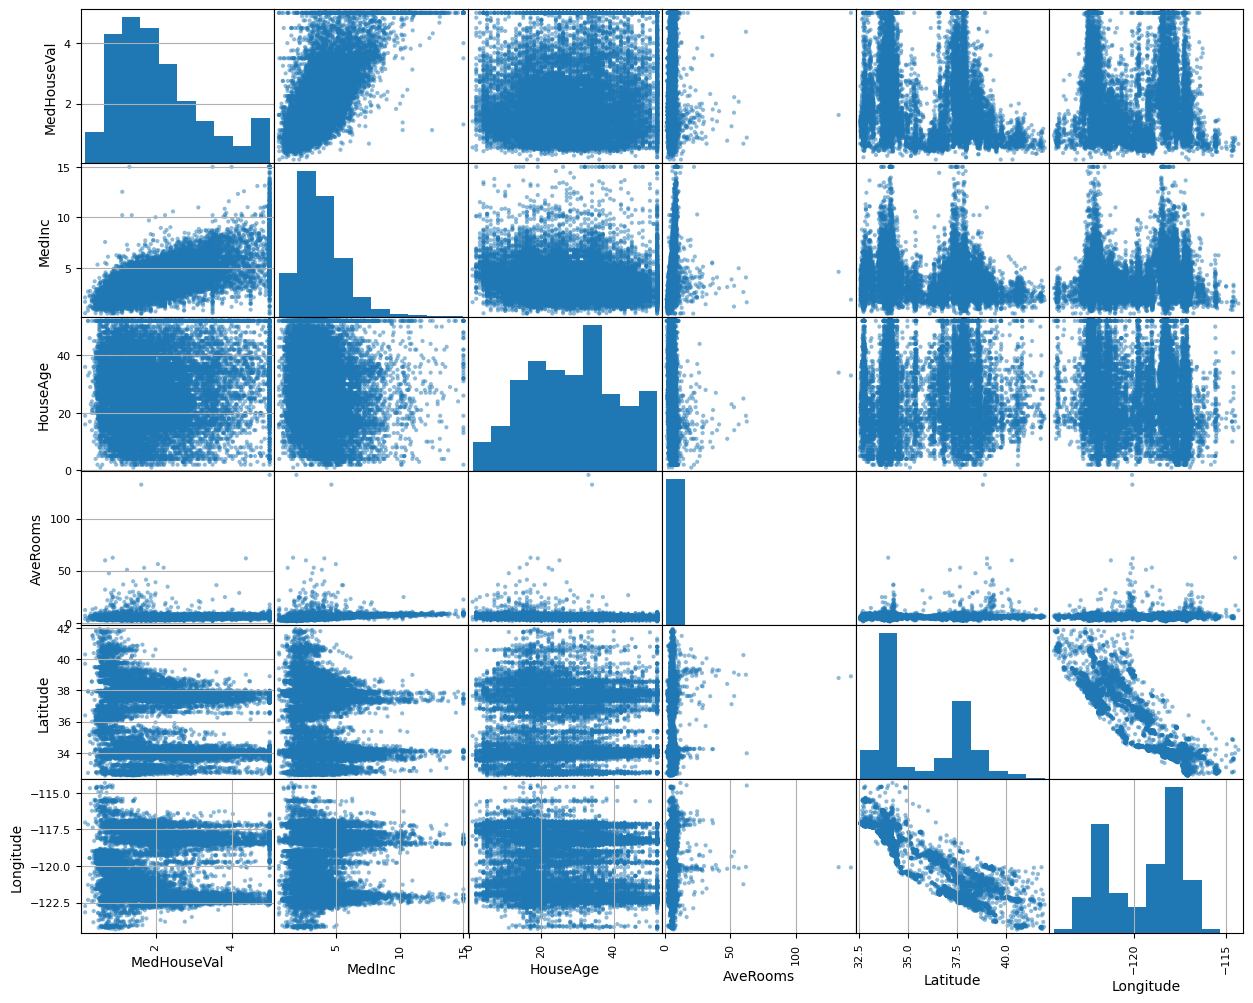

In [ ]:
# Select the most promising features based on correlation
attributes = ["MedHouseVal", "MedInc", "HouseAge", "AveRooms", "Latitude", "Longitude"]

# Create a scatter matrix
pd.plotting.scatter_matrix(housing[attributes], figsize=(15, 12))
plt.show()

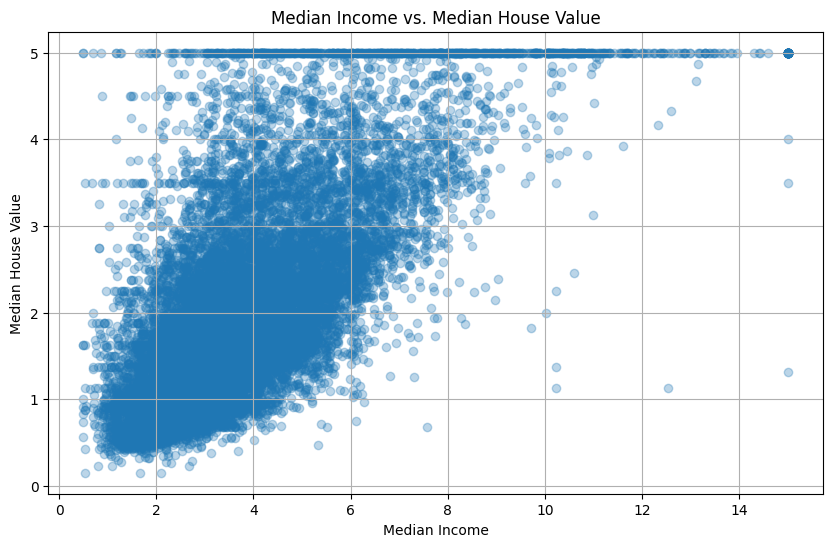

In [ ]:
# Plot median income vs. median house value
plt.figure(figsize=(10, 6))
plt.scatter(housing["MedInc"], housing["MedHouseVal"], alpha=0.3)
plt.xlabel("Median Income")
plt.ylabel("Median House Value")
plt.title("Median Income vs. Median House Value")
plt.show()

In [ ]:
# Create new features
housing["RoomsPerHousehold"] = housing["AveRooms"] / housing["AveOccup"]
housing["BedroomsPerRoom"] = housing["AveBedrms"] / housing["AveRooms"]
housing["PopulationPerHousehold"] = housing["Population"] / housing["AveOccup"]

# Check the correlations with the target variable
housing.corr()["MedHouseVal"].sort_values(ascending=False)

,MedHouseVal
MedHouseVal,1.000000
MedInc,0.687151
RoomsPerHousehold,0.199420
AveRooms,0.146255
HouseAge,0.114146
PopulationPerHousehold,0.064590
AveOccup,-0.021991
Population,-0.026882
AveBedrms,-0.043294
Longitude,-0.047466


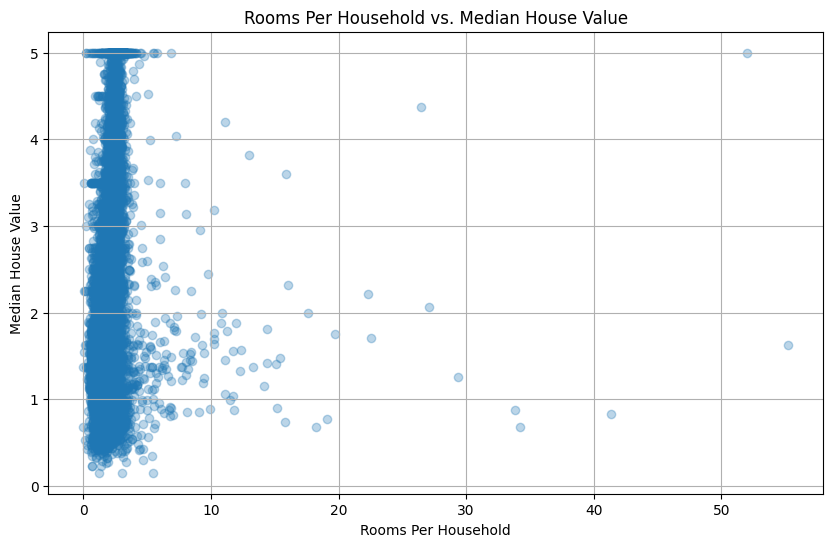

In [ ]:
# Plot RoomsPerHousehold vs. median house value
plt.figure(figsize=(10, 6))
plt.scatter(housing["RoomsPerHousehold"], housing["MedHouseVal"], alpha=0.3)
plt.xlabel("Rooms Per Household")
plt.ylabel("Median House Value")
plt.title("Rooms Per Household vs. Median House Value")
plt.show()

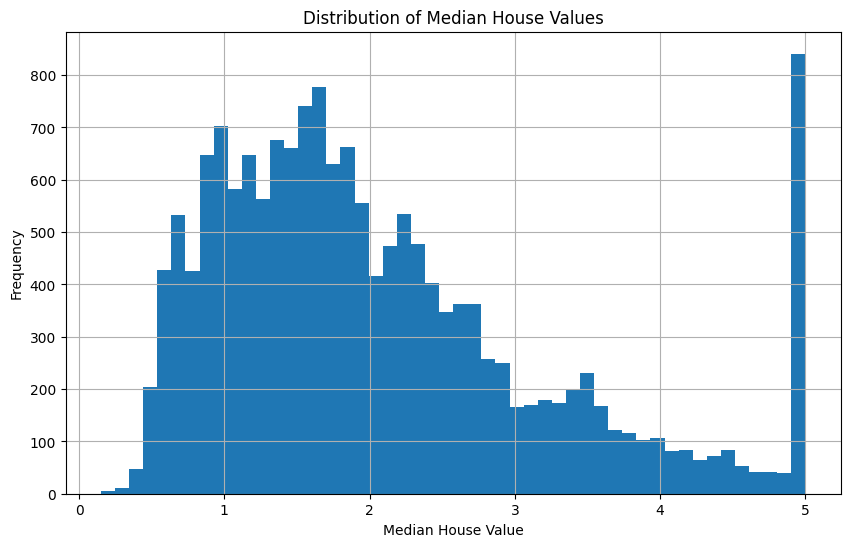

In [ ]:
# Plot the distribution of median house values
plt.figure(figsize=(10, 6))
housing["MedHouseVal"].hist(bins=50)
plt.xlabel("Median House Value")
plt.ylabel("Frequency")
plt.title("Distribution of Median House Values")
plt.show()